In [1]:
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

sys.path.append('../models_new')
import model_utils as util
from construct_model_matrices import ModelMatrixConstructor

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
DATA_DIR = '../../data/Xy_internal_split_data'

In [3]:
matrix_constructor = ModelMatrixConstructor(DATA_DIR)
data_sets = matrix_constructor.construct_model_matrices()

Train:
  ['X_train_2003.csv', 'X_train_2009.csv'] 
  ['y_train_2003.csv', 'y_train_2009.csv']
Valid:
  ['X_valid_2003.csv', 'X_valid_2009.csv'] 
  ['y_valid_2003.csv', 'y_valid_2009.csv']
Test:
  ['X_test_2003.csv', 'X_test_2009.csv'] 
  ['y_test_2003.csv', 'y_test_2009.csv']
Loading data from ['X_train_2003.csv', 'X_train_2009.csv']...
Loading data from ['X_valid_2003.csv', 'X_valid_2009.csv']...
Loading data from ['X_test_2003.csv', 'X_test_2009.csv']...
Loading data from ['y_train_2003.csv', 'y_train_2009.csv']...
Loading data from ['y_valid_2003.csv', 'y_valid_2009.csv']...
Loading data from ['y_test_2003.csv', 'y_test_2009.csv']...
Attempting to fill NAs with average of neighboring cells.
Could not fill density for 6 rows.
Adding quadratic terms...
Adding cubic terms...
Adding interactions...
Attempting to fill NAs with average of neighboring cells.
Could not fill density for 28 rows.
Adding quadratic terms...
Adding cubic terms...
Adding interactions...
Attempting to fill NAs wit

In [4]:
def print_dims(data_set, name):
    print('%s:\n X: %r\n y: %r' 
          % (name, data_set[0].shape, data_set[1].shape))

In [5]:
[[X_train, y_train], [X_valid, y_valid], [X_test, y_test]] = data_sets
for (data_set, name) in zip(data_sets, ['Train', 'Valid', 'Test']):
    print_dims(data_set, name)

Train:
 X: (52898, 232)
 y: (52898, 1)
Valid:
 X: (40128, 232)
 y: (40128, 1)
Test:
 X: (17086, 232)
 y: (17086, 1)


In [6]:
print('NAs:')
for field in list(X_train):
    n_na = sum(np.isnan(X_train[field]))
    if n_na:
        print('%s:\t%d' % (field, n_na))

NAs:


In [7]:
max(X_test.x), max(X_test.y)

(195, 360)

In [8]:
X_train.head()

,x,y,lon,lat,etopo1,btl_t1,btl_t2,vgt,age,density,...,summerP1:PPT,summerP2:Pmean,summerP2:PPT,Pmean:POctSep,Pmean:PcumOctSep,Pmean:PPT,POctSep:PcumOctSep,POctSep:PPT,PcumOctSep:PPT,btl_t1:btl_t2
0,37,69,-119.110980,35.837349,141,0,0,0,0.0,685.590759,...,0.0,71.246358,8313.731294,1274.712659,2384.219847,10727.534453,33059.173593,148746.108359,278214.404698,0
1,38,69,-119.003126,35.859120,194,0,0,1,0.0,6174.752441,...,0.0,87.973222,10877.875727,1495.543933,2667.459467,12075.598338,40849.047960,184923.783018,329830.963074,0
2,39,69,-118.895219,35.880769,292,0,0,1,0.0,7538.154297,...,0.0,109.357355,14074.139083,1768.376840,3059.531818,13847.487076,50284.329646,227587.633142,393757.478054,0
3,40,69,-118.787258,35.902297,635,0,0,1,0.0,10577.365234,...,0.0,159.414539,20005.629382,2353.903810,4064.747016,17891.767901,67110.931910,295401.709572,510102.924386,0
4,41,69,-118.679245,35.923705,1250,1,1,1,38.0,41283.019531,...,0.0,268.615209,30930.918463,3727.077521,6608.496303,27649.504627,102576.042767,429171.272713,760965.328241,1


In [9]:
density_matrix_train = util.column2matrix(
    X_train.loc[X_train.year == 2009, :], 'density', cell_dim=1)
density_matrix_valid = util.column2matrix(
    X_valid.loc[X_valid.year == 2009, :], 'density', cell_dim=1)
density_matrix_test  = util.column2matrix(
    X_test.loc[X_test.year   == 2009, :], 'density', cell_dim=1)

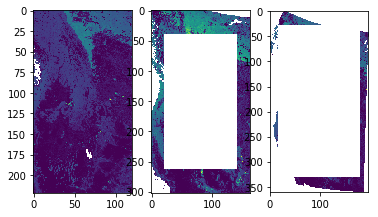

In [10]:
plt.subplot(1, 3, 1);
imshow(np.rot90(density_matrix_train));
plt.subplot(1, 3, 2);
imshow(np.rot90(density_matrix_valid));
plt.subplot(1, 3, 3);
imshow(np.rot90(density_matrix_test));

In [11]:
btl_matrix_train = util.column2matrix(
    X_train.loc[X_train.year == 2009, :], 'btl_t1', cell_dim=1)
btl_matrix_valid = util.column2matrix(
    X_valid.loc[X_valid.year == 2009, :], 'btl_t1', cell_dim=1)
btl_matrix_test  = util.column2matrix(
    X_test.loc[X_test.year   == 2009, :], 'btl_t1', cell_dim=1)

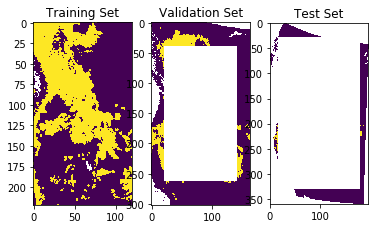

In [12]:
plt.subplot(1, 3, 1);
imshow(np.rot90(btl_matrix_train));
plt.title('Training Set');
plt.subplot(1, 3, 2);
imshow(np.rot90(btl_matrix_valid));
plt.title('Validation Set');
plt.subplot(1, 3, 3);
imshow(np.rot90(btl_matrix_test));
plt.title('Test Set');

In [13]:
util.print_percent_presence(y_train, 'y_train')
util.print_percent_presence(y_valid, 'y_valid')
util.print_percent_presence(y_test, 'y_test')

Percent presence in y_train: 33.03%
Percent presence in y_valid: 10.32%
Percent presence in y_test: 1.44%


In [14]:
print('Baseline accuracy if predicting "absent" for all cells:')
print('  train:', 100 - 33.03)
print('  valid:', 100 - 10.31)
print('  test: ', 100 - 1.44)

Baseline accuracy if predicting "absent" for all cells:
  train: 66.97
  valid: 89.69
  test:  98.56


In [15]:
full_train = X_train.copy()
full_valid = X_valid.copy()
full_test = X_test.copy()

full_train['btl_t'] = y_train['btl_t']
full_valid['btl_t'] = y_valid['btl_t']
full_test['btl_t'] = y_test['btl_t']

In [16]:
drop = ['x', 'y', 'year']
X_train = X_train.drop(drop, axis=1)
X_valid = X_valid.drop(drop, axis=1)
X_test  = X_test.drop(drop, axis=1)

In [17]:
predictors = list(X_train)

In [18]:
def scale_data(X_train, X_valid, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test  = scaler.transform(X_test)
    return X_train, X_valid, X_test

In [19]:
X_train, X_valid, X_test = scale_data(X_train, X_valid, X_test) 

In [20]:
y_train = y_train['btl_t'].values.reshape(-1)
y_valid = y_valid['btl_t'].values.reshape(-1)
y_test  = y_test['btl_t'].values.reshape(-1)

In [21]:
# Find optimal regularization via best validation-set accuracy
#l1_mods = []
l2_mods = []
Cs = np.logspace(-4, 0, 5)

t0 = time.time()
for C in Cs:
    print('Testing C =', C)
    for penalty in ['l2']: #['l1', 'l2']:
        print('  %s:' % penalty, end=' ')
        logistic_clf = LogisticRegression(C=C, penalty=penalty, n_jobs=-1)
        logistic_clf.fit(X_train, y_train)
        preds = logistic_clf.predict(X_valid)
        accuracy = sum(y_valid == preds) / len(preds)
        print(round(accuracy, 4))
        #if penalty == 'l1':
        #    l1_mods.append(accuracy)
        #else:
        l2_mods.append(accuracy)
        print('Elapsed time: %.2f minutes' % ((time.time() - t0) / 60))

Testing C = 0.0001
  l2: 

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.952
Elapsed time: 0.04 minutes
Testing C = 0.001
  l2: 0.9554
Elapsed time: 0.08 minutes
Testing C = 0.01
  l2: 0.9434
Elapsed time: 0.18 minutes
Testing C = 0.1
  l2: 0.9316
Elapsed time: 0.31 minutes
Testing C = 1.0
  l2: 0.8968
Elapsed time: 0.66 minutes


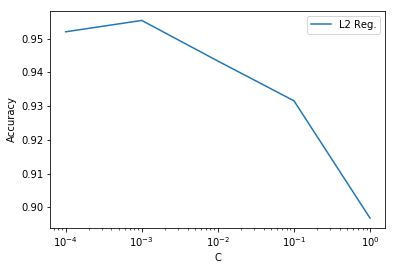

In [22]:
#plt.plot(Cs, l1_mods, label='L1 Reg.');
plt.plot(Cs, l2_mods, label='L2 Reg.');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend(loc='best');

In [23]:
l1_mods = []
l2_mods = []
Cs = np.logspace(-3.5, -2.5, 10)

t0 = time.time()
for C in Cs:
    print('Testing C =', C)
    for penalty in ['l1', 'l2']:
        print('  %s:' % penalty, end=' ')
        logistic_clf = LogisticRegression(C=C, penalty=penalty, n_jobs=-1)
        logistic_clf.fit(X_train, y_train)
        preds = logistic_clf.predict(X_valid)
        accuracy = sum(y_valid == preds) / len(preds)
        print(round(accuracy, 4))
        if penalty == 'l1':
            l1_mods.append(accuracy)
        else:
            l2_mods.append(accuracy)
        print('Elapsed time: %.2f minutes' % ((time.time() - t0) / 60))

Testing C = 0.00031622776601683794
  l1: 

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.9528
Elapsed time: 0.02 minutes
  l2: 0.9559
Elapsed time: 0.06 minutes
Testing C = 0.00040842386526745213
  l1: 0.9532
Elapsed time: 0.07 minutes
  l2: 0.9563
Elapsed time: 0.12 minutes
Testing C = 0.0005274997063702619
  l1: 0.9532
Elapsed time: 0.13 minutes
  l2: 0.9563
Elapsed time: 0.17 minutes
Testing C = 0.0006812920690579615
  l1: 0.9538
Elapsed time: 0.19 minutes
  l2: 0.9562
Elapsed time: 0.23 minutes
Testing C = 0.0008799225435691075
  l1: 0.9537
Elapsed time: 0.25 minutes
  l2: 0.9559
Elapsed time: 0.30 minutes
Testing C = 0.0011364636663857243
  l1: 0.954
Elapsed time: 0.31 minutes
  l2: 0.9543
Elapsed time: 0.36 minutes
Testing C = 0.0014677992676220691
  l1: 0.9544
Elapsed time: 0.37 minutes
  l2: 0.9528
Elapsed time: 0.43 minutes
Testing C = 0.0018957356524063754
  l1: 0.9548
Elapsed time: 0.45 minutes
  l2: 0.9512
Elapsed time: 0.50 minutes
Testing C = 0.002448436746822227
  l1: 0.9546
Elapsed time: 0.52 minutes
  l2: 0.9497
Elapsed time: 0.58 minutes
Testing C = 0.0

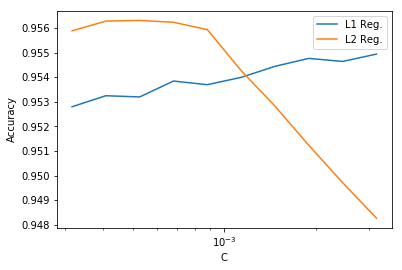

In [24]:
plt.plot(Cs, l1_mods, label='L1 Reg.');
plt.plot(Cs, l2_mods, label='L2 Reg.');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend(loc='best');

In [25]:
[(c, acc) for c, acc in zip(Cs, l2_mods)]

[(0.00031622776601683794, 0.9558911483253588),
 (0.00040842386526745213, 0.9562898724082934),
 (0.0005274997063702619, 0.9563147926634769),
 (0.0006812920690579615, 0.9562400318979266),
 (0.0008799225435691075, 0.9559409888357256),
 (0.0011364636663857243, 0.954271331738437),
 (0.0014677992676220691, 0.952825956937799),
 (0.0018957356524063754, 0.9512310606060606),
 (0.002448436746822227, 0.9497109250398724),
 (0.0031622776601683794, 0.9482655502392344)]

In [26]:
best_C = 0.00052749970637026194

In [27]:
logistic_clf = LogisticRegression(C=best_C, penalty='l2')
logistic_clf.fit(X_train, y_train)
preds = logistic_clf.predict(X_test)
probs = logistic_clf.predict_proba(X_test)
accuracy = sum(y_test == preds) / len(preds)
accuracy

0.9925084864801592

In [28]:
def get_predictions_at_threshold(pred_ps, threshold):
    return 1 * (pred_ps >= threshold)

def threshold_plot(pred_ps, targets):
    thresholds = np.linspace(0, 1, 500)
    accuracies = []
    n = len(pred_ps)

    for threshold in thresholds:
        preds = get_predictions_at_threshold(pred_ps, threshold)
        accuracies.append((preds == targets).sum() / n)
        
    plt.plot(thresholds, accuracies);
    optimal_threshold = thresholds[np.argmax(accuracies)]
    optimal_accuracy = max(accuracies)
    plt.plot([optimal_threshold, optimal_threshold], 
             [min(accuracies), max(accuracies)], 
             'r')
    plt.plot([0, 1], [optimal_accuracy, optimal_accuracy], 'r')
    plt.xlabel('Threshold for predicting "Renewal"')
    plt.ylabel('Accuracy')
    plt.show()
    return {'threshold': optimal_threshold, 'accuracy': optimal_accuracy}

[[0.97788589 0.02211411]
 [0.97270289 0.02729711]
 [0.97440819 0.02559181]
 [0.97315832 0.02684168]
 [0.97983718 0.02016282]]


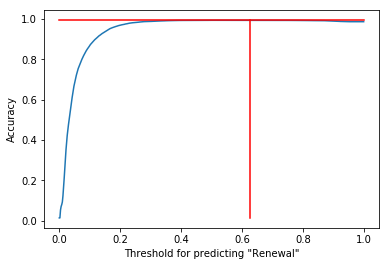

{'threshold': 0.627254509018036, 'accuracy': 0.992801123727028}


In [29]:
pred_ps = logistic_clf.predict_proba(X_test)
print(pred_ps[:5])
pred_ps = np.array([p[1] for p in pred_ps])
pred_ps[:5]

THRESHOLD = 0.5
preds = get_predictions_at_threshold(pred_ps, THRESHOLD)
preds[:5]

best_threshold = threshold_plot(pred_ps, y_test);
print(best_threshold)

In [30]:
cm = util.make_confusion_matrix(y_test, pred_ps, 0.5)
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	182		64
        0	64		16776
Accuracy:  0.9925084864801592
Precision: 0.7398373983739838
Recall:    0.7398373983739838
F1:        0.7398373983739838


In [31]:
cm = util.make_confusion_matrix(
    y_test, pred_ps, best_threshold['threshold'])
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	165		81
        0	42		16798
Accuracy:  0.992801123727028
Precision: 0.7971014492753623
Recall:    0.6707317073170732
F1:        0.728476821192053


In [32]:
auc_metrics = util.get_auc(y_test, pred_ps)

AUC:       0.9861791031805804


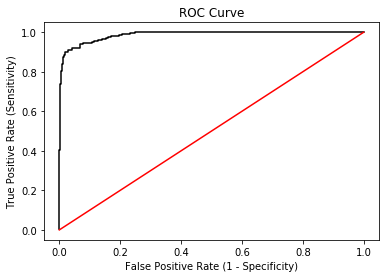

In [33]:
util.plot_roc(auc_metrics['fpr'], auc_metrics['tpr'])

In [34]:
coefs = pd.DataFrame(
    [[pred, coef] 
     for pred, coef in zip(predictors, logistic_clf.coef_[0])], 
    columns=['predictor', 'coef'])
coefs['abs'] = np.abs(coefs.coef)
coefs = coefs.sort_values('abs', ascending=False)
coefs = coefs.drop(['abs'], axis=1)
coefs

,predictor,coef
8,sum9_t1,0.578284
3,btl_t1,0.445214
9,sum9_t2,0.304247
5,vgt,0.268208
4,btl_t2,0.247457
228,btl_t1:btl_t2,0.176649
77,lat:etopo1,0.091632
48,OctTmin_sq,0.085175
1,lat,0.073580
68,lon:lat,-0.071063


In [36]:
print(full_train.shape)
#type(pred_ps_train)

(52898, 233)


In [37]:
logistic_clf.predict_proba(X_train)

array([[0.99146316, 0.00853684],
       [0.98341925, 0.01658075],
       [0.98209133, 0.01790867],
       ...,
       [0.96527844, 0.03472156],
       [0.98025965, 0.01974035],
       [0.96949198, 0.03050802]])

In [38]:
pred_ps_train = logistic_clf.predict_proba(X_train)
pred_ps_train = np.array([p[1] for p in pred_ps_train])

pred_ps_valid = logistic_clf.predict_proba(X_valid)
pred_ps_valid = np.array([p[1] for p in pred_ps_valid])

full_train['probs'] = pred_ps_train
full_train['preds'] = get_predictions_at_threshold(
    pred_ps_train, best_threshold['threshold'])


full_valid['probs'] = pred_ps_valid
full_valid['preds'] = get_predictions_at_threshold(
    pred_ps_valid, best_threshold['threshold'])

In [39]:
full_test['probs'] = pred_ps
full_test['preds'] = get_predictions_at_threshold(
    pred_ps, best_threshold['threshold'])
full_test.head()

,x,y,lon,lat,etopo1,btl_t1,btl_t2,vgt,age,density,...,Pmean:POctSep,Pmean:PcumOctSep,Pmean:PPT,POctSep:PcumOctSep,POctSep:PPT,PcumOctSep:PPT,btl_t1:btl_t2,btl_t,probs,preds
0,164,0,-104.671034,31.343318,1182,0,0,0,0.0,1513.529907,...,7728.515636,14722.520510,47478.045849,167774.444306,541048.847828,1.030677e+06,0,0,0.022114,0
1,165,0,-104.567392,31.348555,1348,0,0,0,0.0,3529.294678,...,9288.721479,17918.724079,56947.145630,200513.589331,637248.306400,1.229306e+06,0,0,0.027297,0
2,166,0,-104.463740,31.353674,1373,0,0,0,0.0,0.000000,...,9359.679818,18208.108228,57917.571668,199207.262723,633651.819883,1.232692e+06,0,0,0.025592,0
3,167,0,-104.360077,31.358676,1338,0,0,0,0.0,5712.242188,...,8819.522723,17290.923899,55501.409087,184260.186406,591449.019377,1.159553e+06,0,0,0.026842,0
4,168,0,-104.256404,31.363561,1154,0,0,0,0.0,509.230774,...,7772.170112,15359.644565,49922.198262,158397.422078,514826.204184,1.017418e+06,0,0,0.020163,0


In [40]:
def pred_plot(actual_matrix, pred_matrix, error_matrix, year):
    plt.subplot(131)
    imshow(np.rot90(actual_matrix));
    plt.title('%d Actual' % year);
    plt.subplot(132)
    imshow(np.rot90(pred_matrix));
    plt.title('%d Predicted' % year);
    plt.subplot(133)
    imshow(np.rot90(error_matrix));
    plt.title('%d Error' % year);

In [41]:
def make_actual_pred_and_error_matrices(
    data, year, pred_type='preds', plot=False):
    data_year = data.loc[data.year == year, :]
    actual_matrix = util.column2matrix(data_year, 'btl_t', cell_dim=1)
    pred_matrix   = util.column2matrix(data_year, pred_type, cell_dim=1)
    error_matrix  = pred_matrix - actual_matrix
    if plot:
        pred_plot(actual_matrix, pred_matrix, error_matrix, year)        
    return actual_matrix, pred_matrix, error_matrix

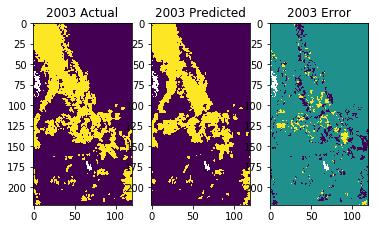

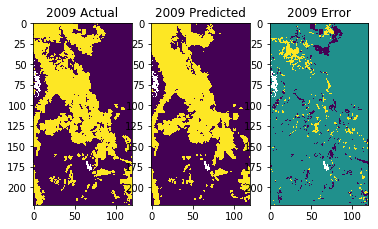

In [42]:
years = [2003, 2009]
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_train, year, plot=True)

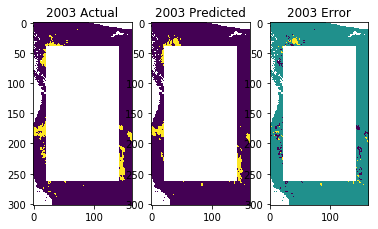

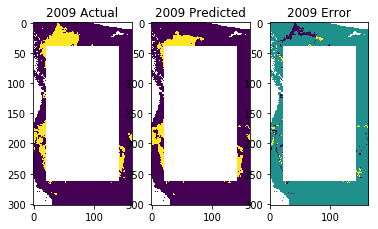

In [43]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_valid, year, plot=True)

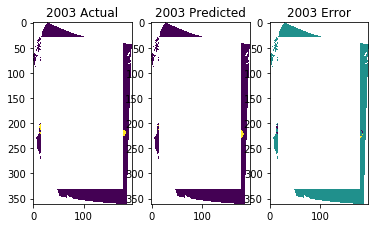

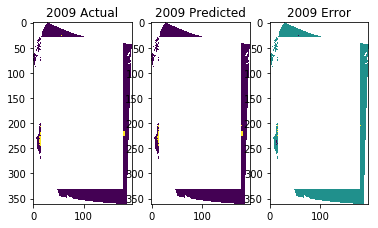

In [44]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_test, year, plot=True)

In [45]:
all_data = full_train.append(full_valid).append(full_test)
all_data.index = range(all_data.shape[0])

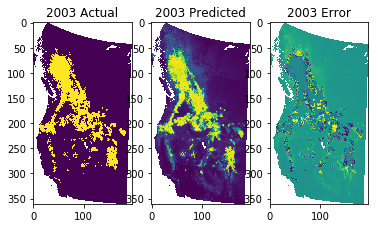

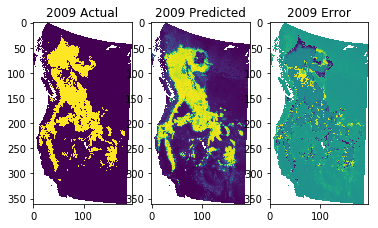

In [46]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(
        all_data, year, pred_type='probs', plot=True)